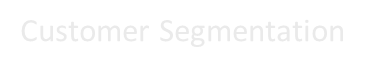

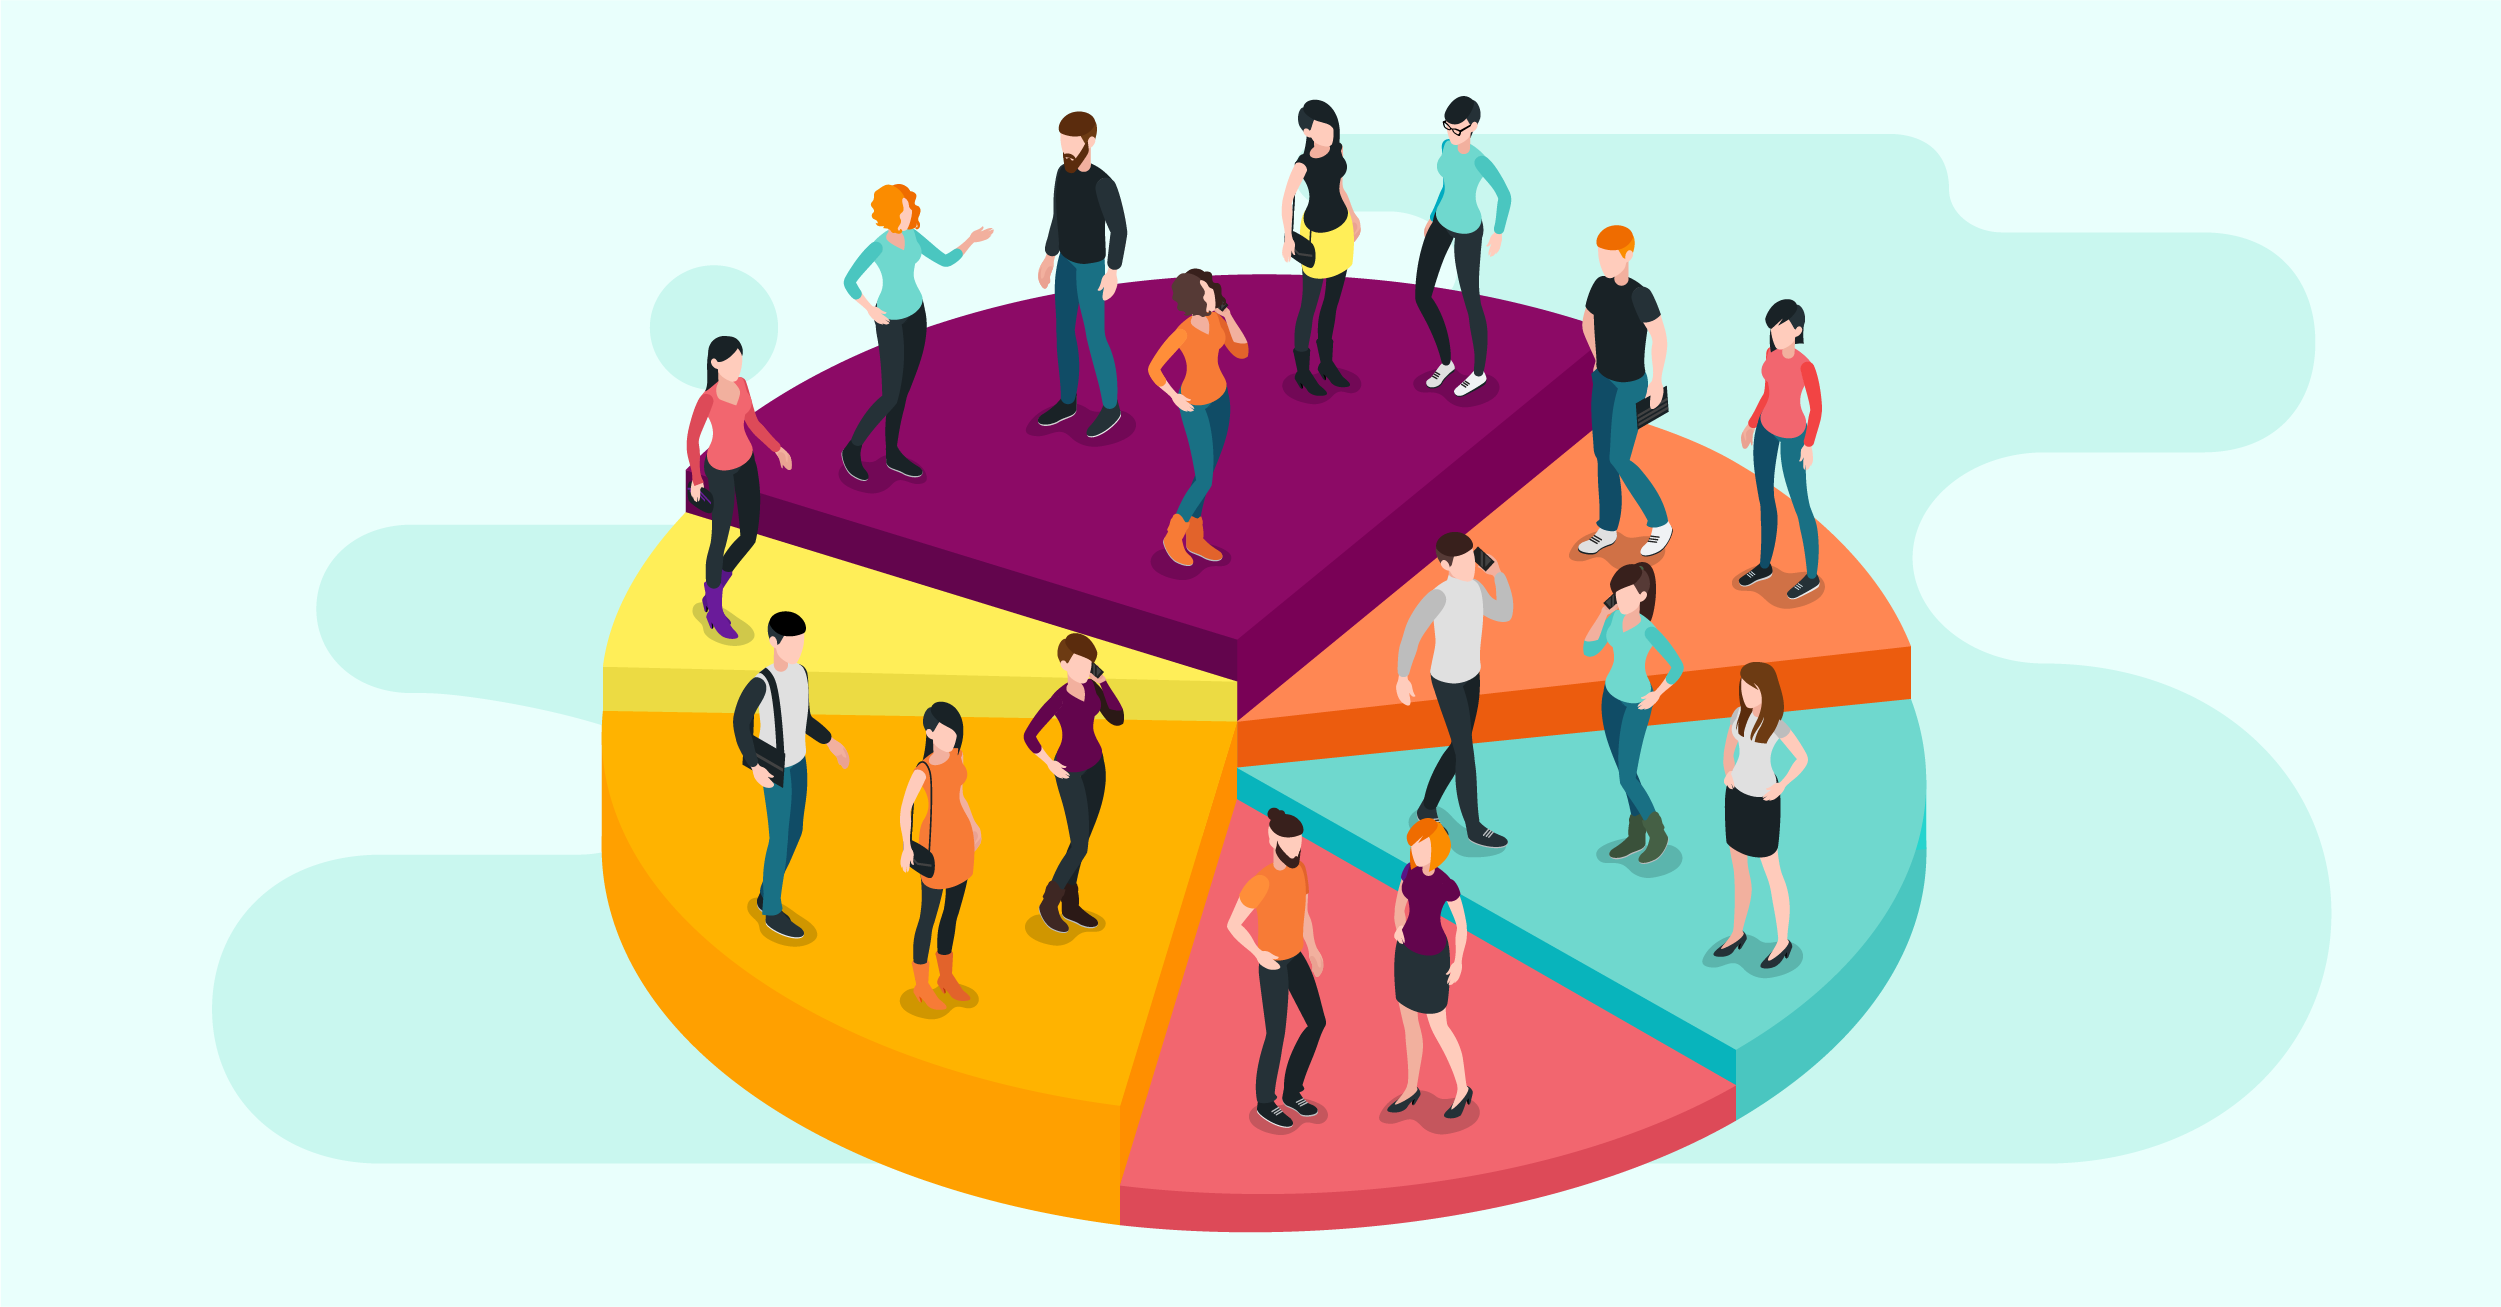

**problem**

This project focuses on analyzing a UK-based online retailer's transactional dataset from 2010-2011, available on the https://archive.ics.uci.edu/dataset/352/online+retail . The goal is to enhance marketing strategies and drive sales through customer segmentation. By transforming transactional data into a customer-centric format, new features will be created to segment customers into distinct groups using the K-means clustering algorithm. This segmentation provides insights into customer profiles and preferences. Additionally, a recommendation system will be developed to suggest top-selling products to customers within each segment, improving marketing efficiency and boosting sales.

********************************************************************************

**Objectives:**

**Data Cleaning :-**

Clean the dataset by handling missing values, duplicates, and outliers.

**Feature Engineering:-**

Develop new features based on the transactional data to create a customer-centric dataset.

**Data Preprocessing:-**

feature scaling and dimensionality reduction to streamline the data.

**Customer Segmentation using K-Means Clustering:-**

Segment customers into distinct groups using K-means.

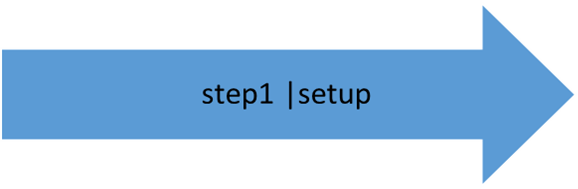

**import packages**

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

**Load data**

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

# Loading the dataset
data=pd.read_excel("/content/drive/MyDrive/datasets/Online Retail.xlsx")

**Dataset Description**

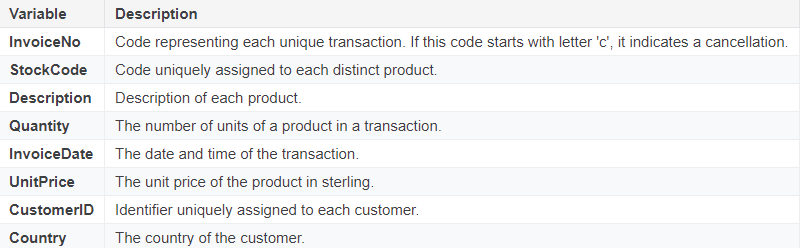

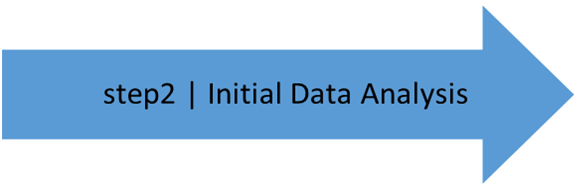

In [4]:
# checking top 5 rows of dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# show shape of data
data.shape #(number of rows , number of columns)

(541909, 8)

In [6]:
#checking bottom 5 rows of dataset
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
# show info for data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**As we can see we have most of null values in customerID , Description and all other columns looks fine. we can drop null values in customerID columns and Description as we are making customer segmentation and keeping those null values make no sense**

In [8]:
#columns of dataset
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

**Summary Statistics**

In [9]:
# Summary statistics for numerical variables
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [10]:
# Summary statistics for categorical variables
data.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,541909,38,United Kingdom,495478


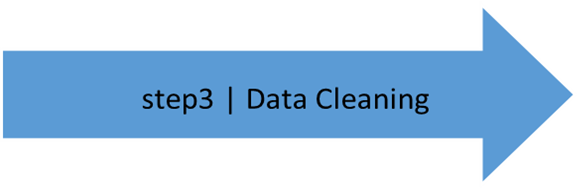

**Handling Missing Values**

In [11]:
#checking for null values in dataset
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


I will determine the percentage of missing values present in each column

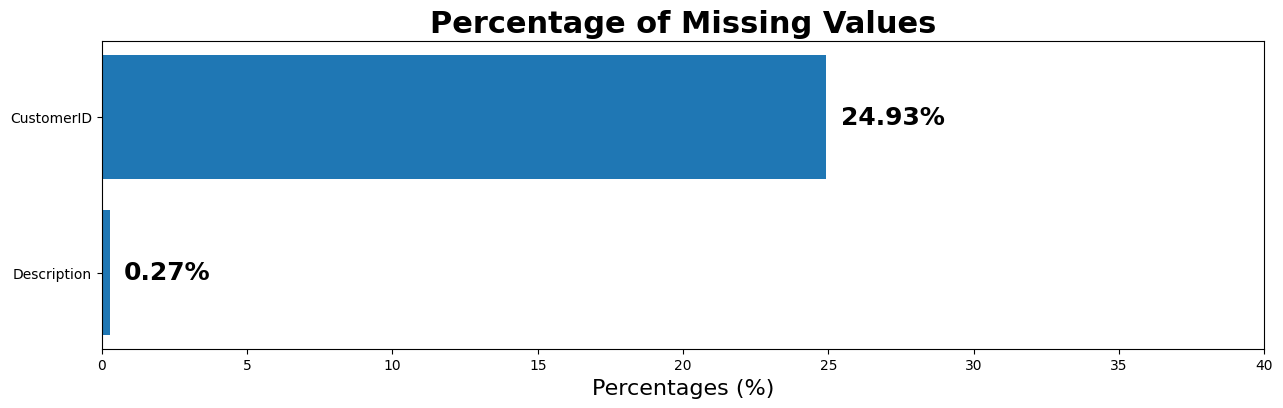

In [12]:
# Calculating the percentage of missing values for each column
missing_data = data.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / data.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#1f77b4')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

Here we have null values present in our dataset like in CustomerID and Description.we can drop null values in customerID columns as we are making customer segmentation and keeping those null values make no sense

In [13]:
#dropping null values
data.dropna(inplace=True)

In [14]:
data.shape

(406829, 8)

After removing null value from our dataset.

Now we have 406829 rows and 8 columns in our dataset.

In [15]:
#checking for missing values
data.isnull().sum().sum()

0

**Handling duplicates**

In [16]:
#checking shape
data.shape

(406829, 8)

In [17]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


from the result data contain duplicates

In [18]:
data.duplicated().sum()

5225

In [19]:
data.drop_duplicates(inplace=True)

In [20]:
data.shape

(401604, 8)

**Treating Cancelled Transactions**

In [21]:
#changing datatype
data["InvoiceNo"]=data["InvoiceNo"].astype(str)

In [22]:
data=data[~data["InvoiceNo"].str.contains("C")]

Here we dropped some InvoiceNo which starts with 'c' because 'c' indicates a cancellation.

In [23]:
data.shape

(392732, 8)

In [24]:
# Resetting the index of the cleaned dataset
data.reset_index(drop=True, inplace=True)

In [25]:
# Getting the number of rows in the dataframe
data.shape[0]

392732

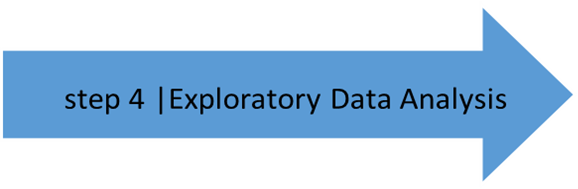

In [26]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [27]:
# Get the value counts of the 'Description' column
Description_df = data['Description'].value_counts().reset_index()


In [28]:
Description_df.head()

,Description,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


In [29]:
# Rename the columns explicitly
Description_df.columns = ['Description_Name', 'Count']

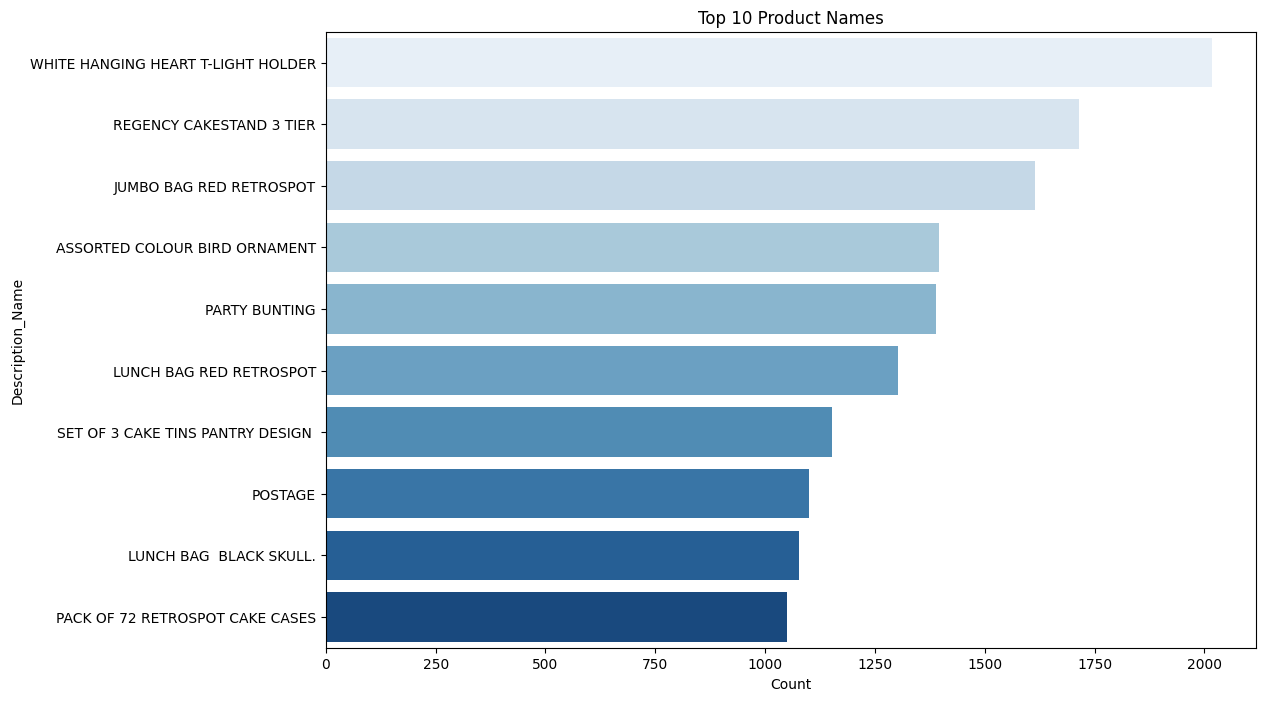

In [30]:

# Plot the top 5 product descriptions
plt.figure(figsize=(12, 8))
plt.title('Top 10 Product Names')
sns.barplot(x='Count', y='Description_Name', data=Description_df[:10], palette='Blues')
plt.show()

**Top product based on maximum selling are :**

1.WHITE HANGING HEART T-LIGHT HOLDER

2.REGENCY CAKESTAND 3 TIER

3.JUMBO BAG RED RETROSPOT

4.PARTY BUNTING

5.LUNCH BAG RED RETROSPOT

In [31]:
Description_df.tail()

,Description_Name,Count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


**Bottom 5 Product based on the selling are:**

1- RUBY GLASS CLUSTER EARRINGS

2- PINK CHRYSANTHEMUMS ART FLOWER

3- 72 CAKE CASES VINTAGE CHRISTMAS

4- WALL ART , THE MAGIC FOREST

5- PAPER CRAFT , LITTLE BIRDIE

In [32]:
StockCode_df=data["StockCode"].value_counts().reset_index()

In [33]:
StockCode_df.columns=["Stockcode_name","count"]

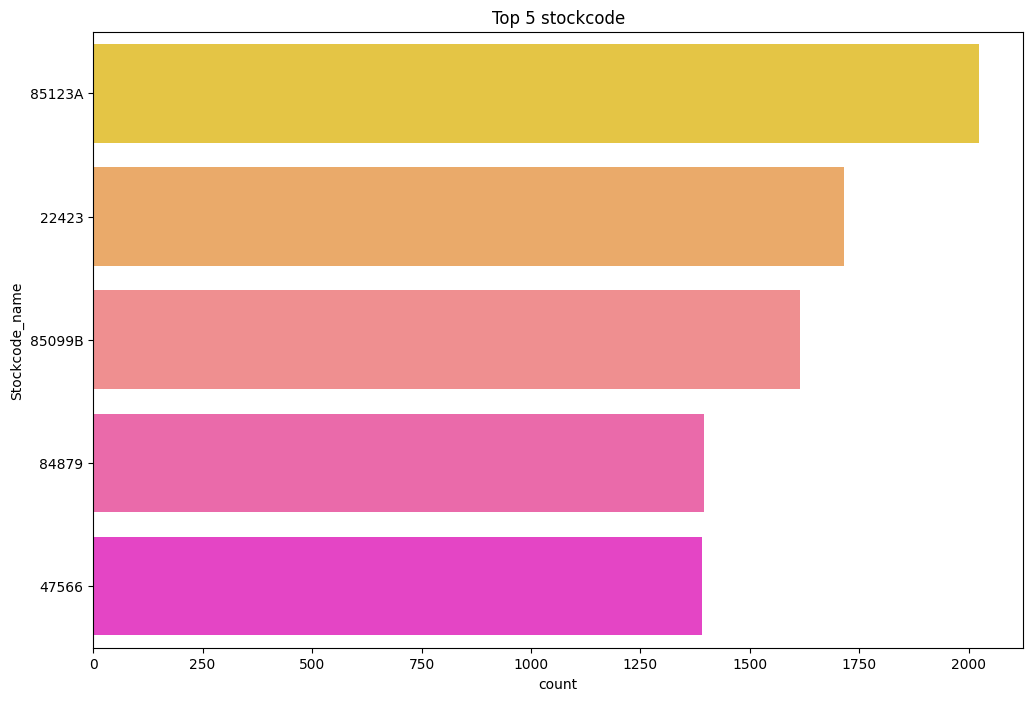

In [34]:
plt.figure(figsize=(12,8))
plt.title("Top 5 stockcode")
sns.barplot(x="count",y="Stockcode_name",data=StockCode_df[:5],palette="spring_r")
plt.show()

**Top 5 Stock name based on selling are :**
1.85123A

2.22423

3.85099B

4.84879

5.4756

In [35]:
#bottom 5 stockcode name
StockCode_df.tail()

,Stockcode_name,count
3660,20678,1
3661,90059D,1
3662,90168,1
3663,90169,1
3664,23843,1


In [36]:
country_df=data["Country"].value_counts().reset_index()

In [37]:
country_df.columns=["country_name","count"]

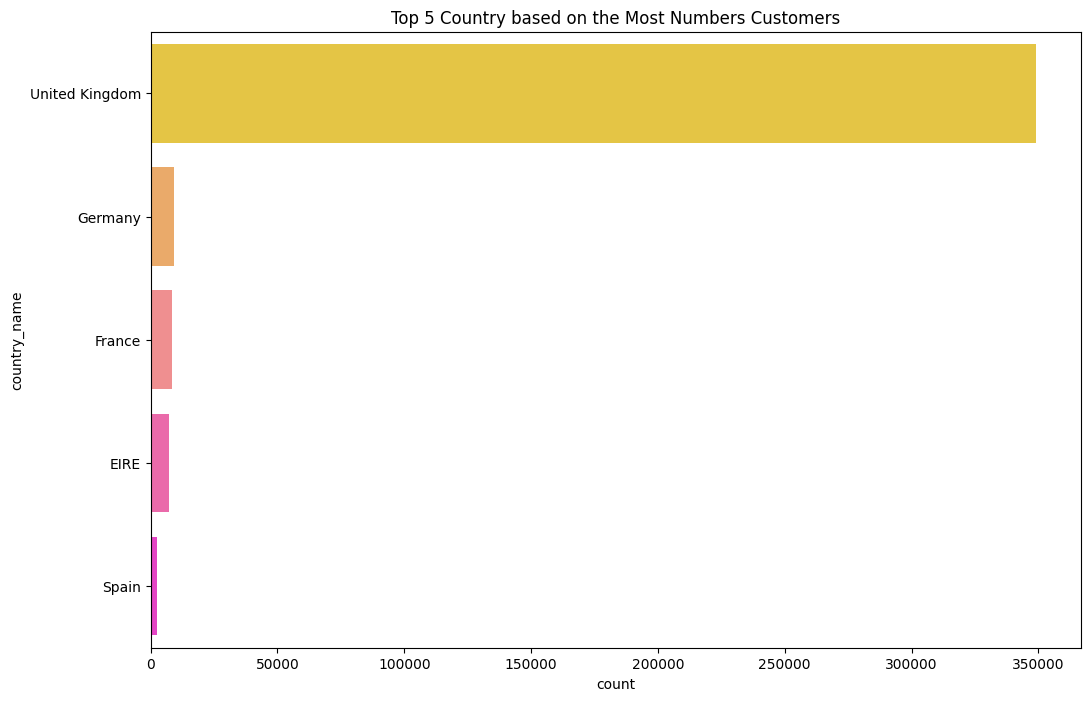

In [38]:
plt.figure(figsize=(12,8))
plt.title("Top 5 Country based on the Most Numbers Customers")
sns.barplot(x="count",y="country_name",data=country_df[:5],palette="spring_r")
plt.show()

**From this graph we can see that most of the customers are from United Kingdom that make sense aas company is from UK bases after that we have Germany ,France ,EIRE and Spain**

In [39]:
#bottom 5 country name
country_df.tail()

,country_name,count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


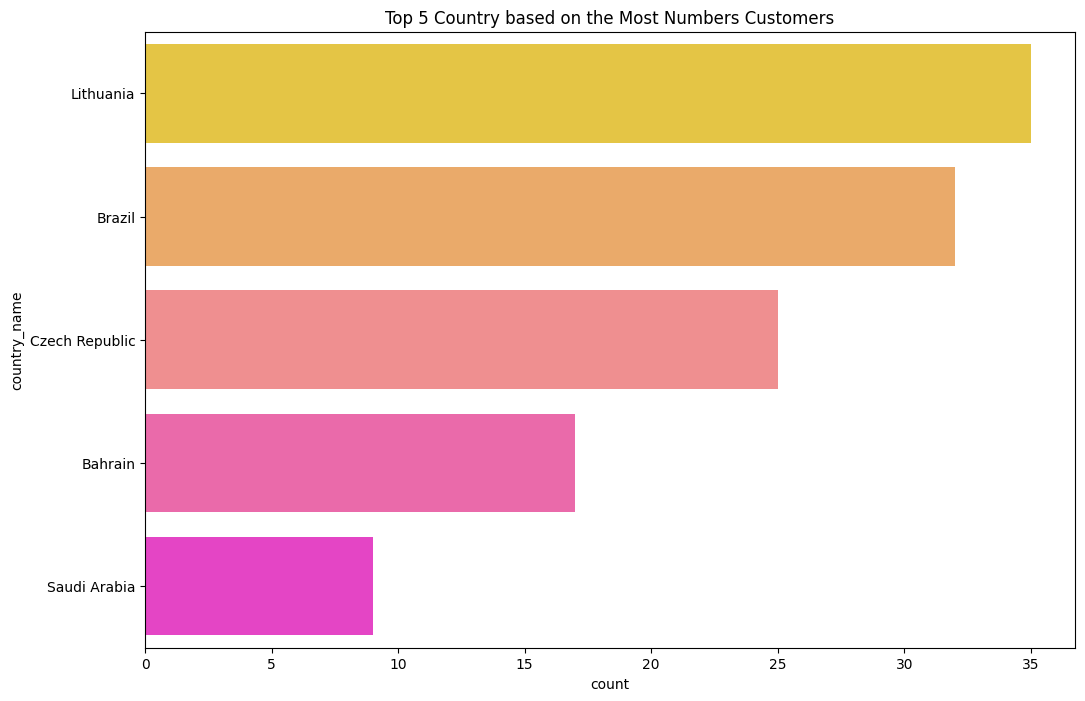

In [41]:
plt.figure(figsize=(12,8))
plt.title("Top 5 Country based on the Most Numbers Customers")
sns.barplot(x="count",y="country_name",data=country_df[-5:],palette="spring_r")
plt.show()

From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia

Distribution of Quantity **bold text**

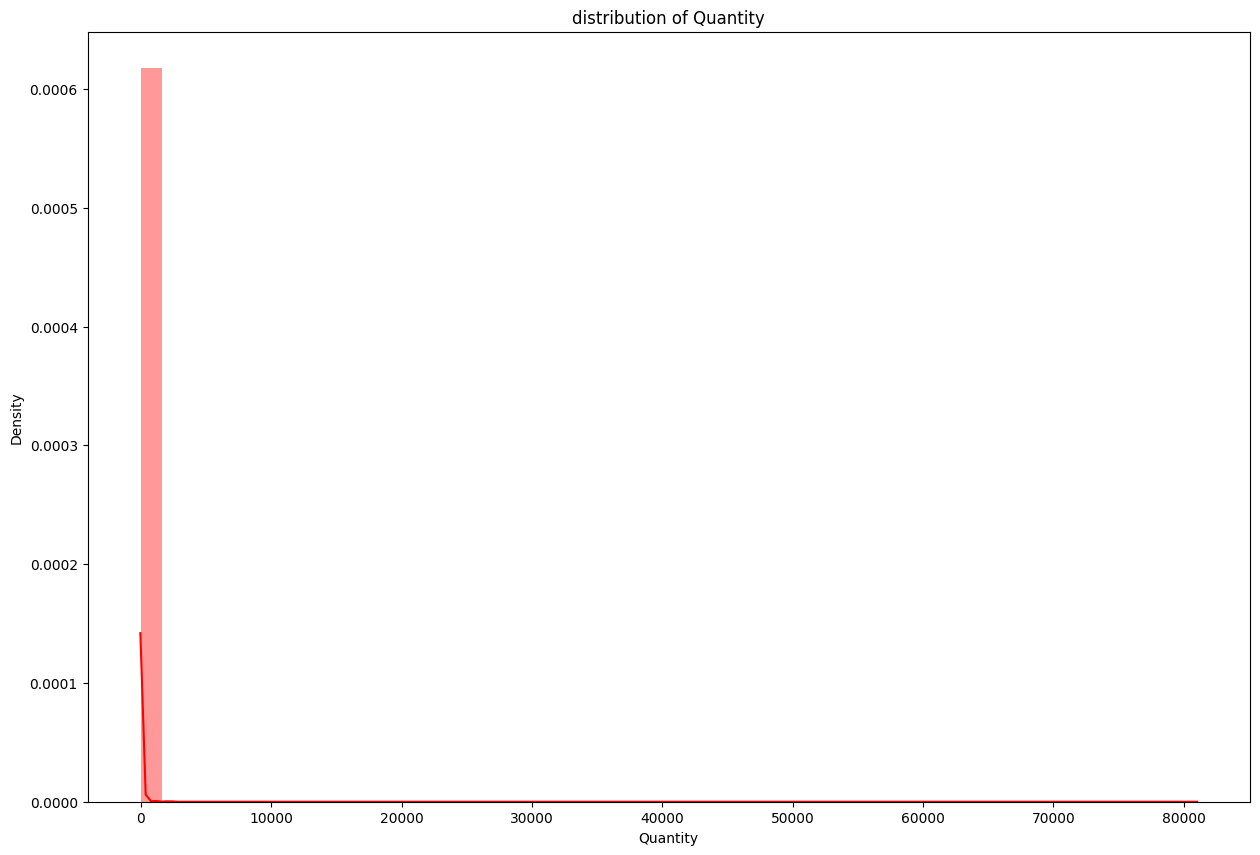

In [40]:
plt.figure(figsize=(15,10))
plt.title("distribution of Quantity")
sns.distplot(data["Quantity"],color="r")
plt.show()

**Here we can see that its a Positively skewed (or right-skewed) distribution. It is a type of distribution in which most values are clustered around the left tail of the distribution**

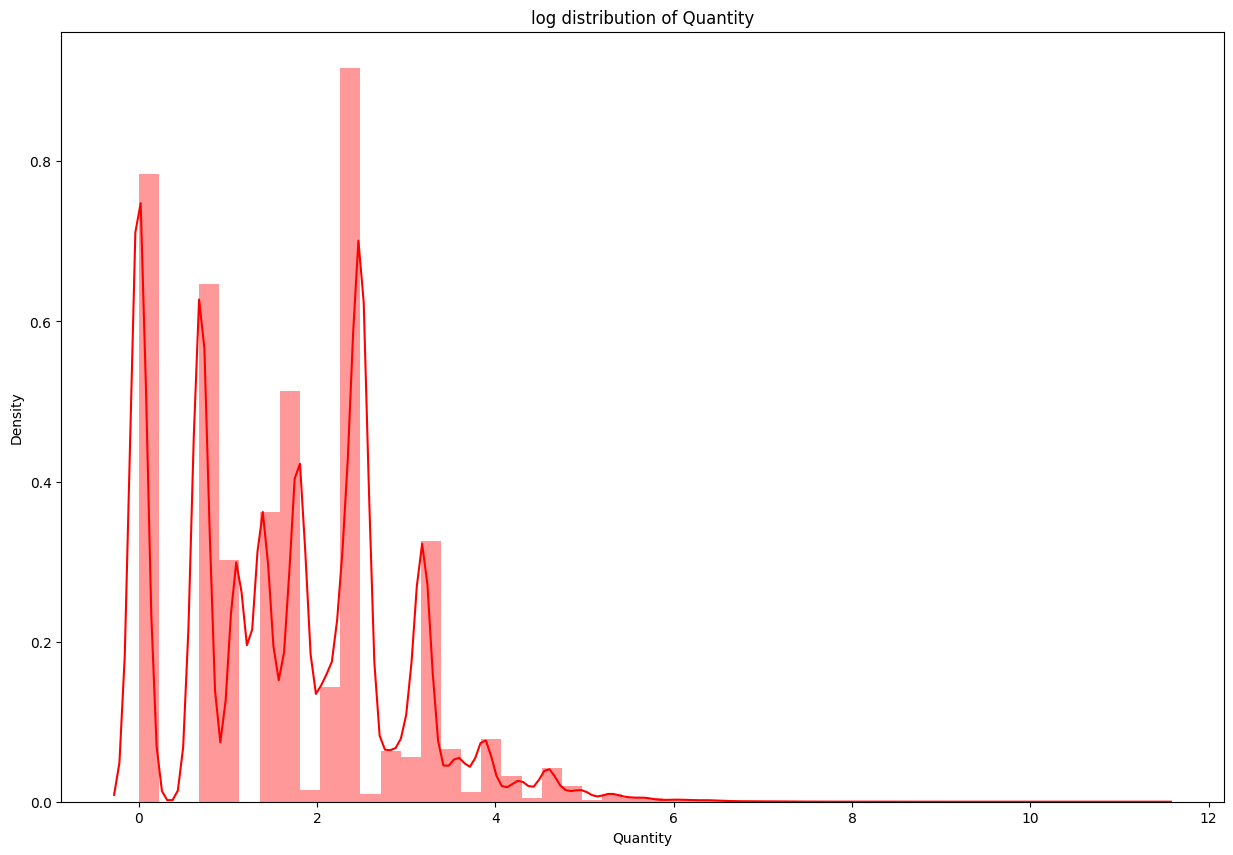

In [42]:
#transforming skewed distribution to symmetrical distribution
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(data['Quantity']),color="r")
plt.show()

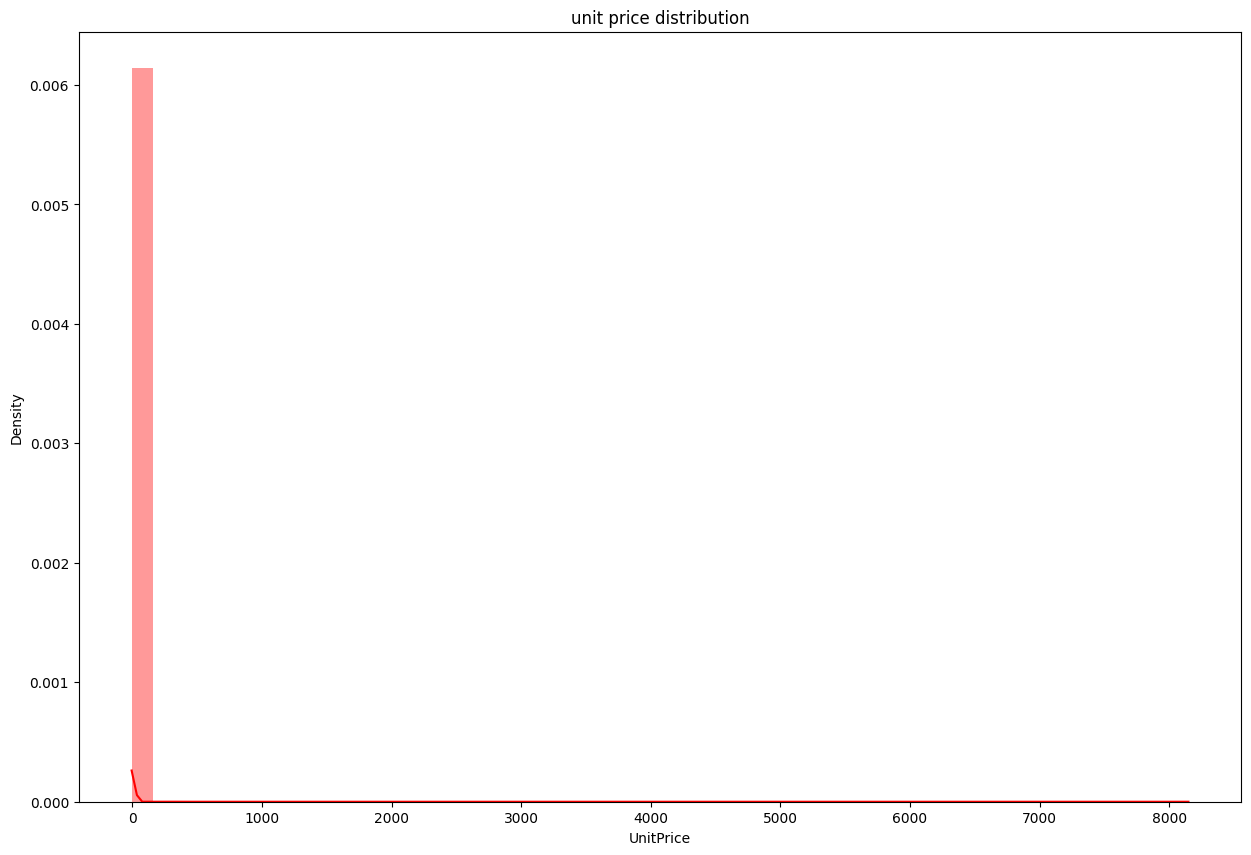

In [43]:
#distribution of unit price
plt.figure(figsize=(15,10))
plt.title("unit price distribution")
sns.distplot(data["UnitPrice"],color="r")
plt.show()

**From the distribution of unit price, we can say that most items have a lower price range.**

In [44]:
#checking for unit price less than 0
data[data["UnitPrice"]<0].count()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


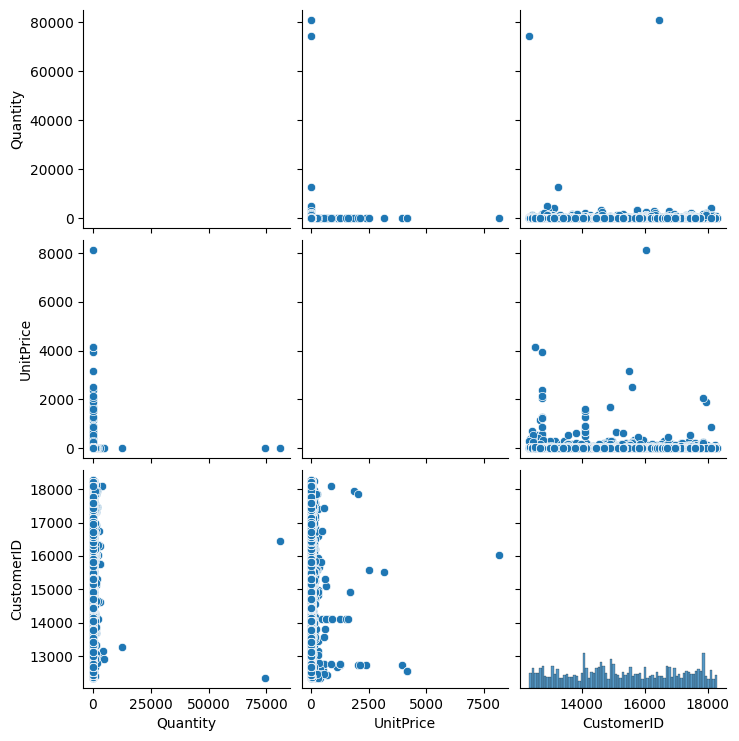

In [45]:
sns.pairplot(data)

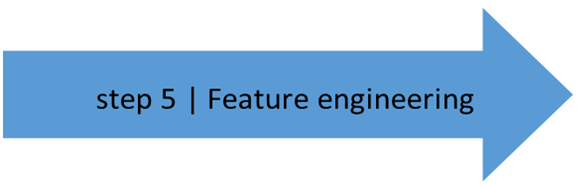

In [46]:
# Assuming the actual column name is 'InvoiceDate'
#Converting InvoiceDate columns into datetime format
data["InvoiceDate"]=pd.to_datetime(data["InvoiceDate"],format="%Y-%m-%d %H:%M:%S")

In [47]:
#Creating a new features from InvoiceInvoiceDate
data["Month"]=data["InvoiceDate"].dt.month_name()
data["Day"]=data["InvoiceDate"].dt.day_name()
data["Hour"]=data["InvoiceDate"].dt.hour

In [48]:
#Creating a new feature TotalAmount from product of Quantity and Unitprice
data["Total Price"]=data["Quantity"]*data["UnitPrice"]

In [49]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34


**Distribution of total price**

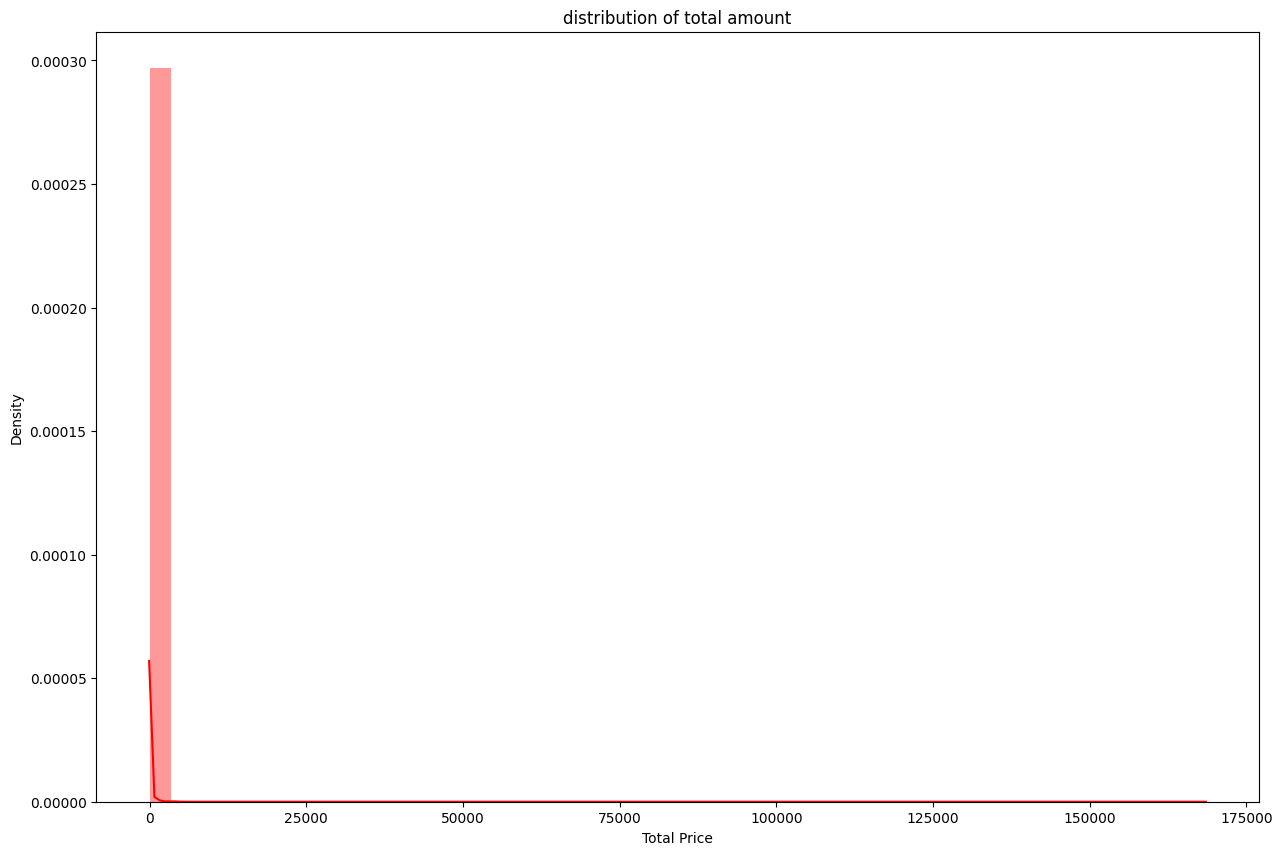

In [50]:
plt.figure(figsize=(15,10))
plt.title("distribution of total amount")
sns.distplot(data["Total Price"],color="r")
plt.show()

In [51]:
month_df=data["Month"].value_counts().reset_index()

In [52]:
month_df.columns=["month_name","count"]

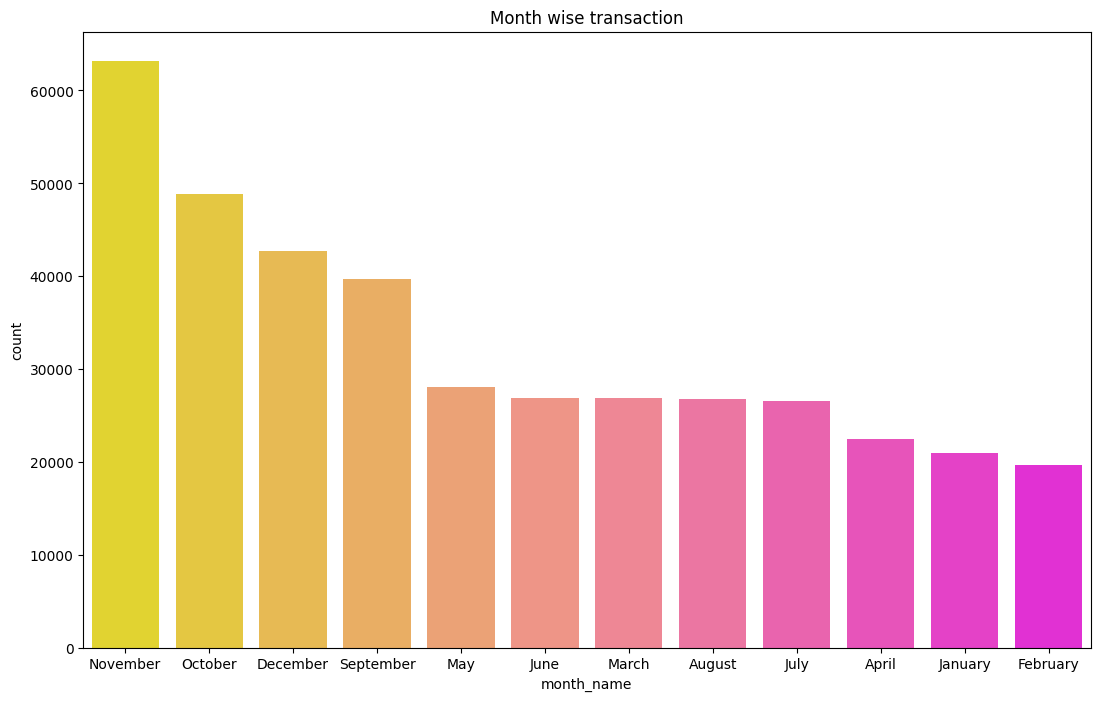

In [53]:
plt.figure(figsize=(13,8))
plt.title("Month wise transaction")
sns.barplot(x="month_name",y="count",data=month_df,palette='spring_r')
plt.show()

♦ Most numbers of customers have purchased the gifts in the month of November, October and December.As we all know they have festive season in end of the year as well new year to celebrate so we have highest numbers of transaction in november, october, december as company have most of the customer wholesales who are keeping stocks for festive season.

♦ Least numbers of purchasing are in the month of April and February. **bold text**

**Days**

In [54]:
day_df=data["Day"].value_counts().reset_index()

In [55]:
day_df.columns=["day_name","count"]

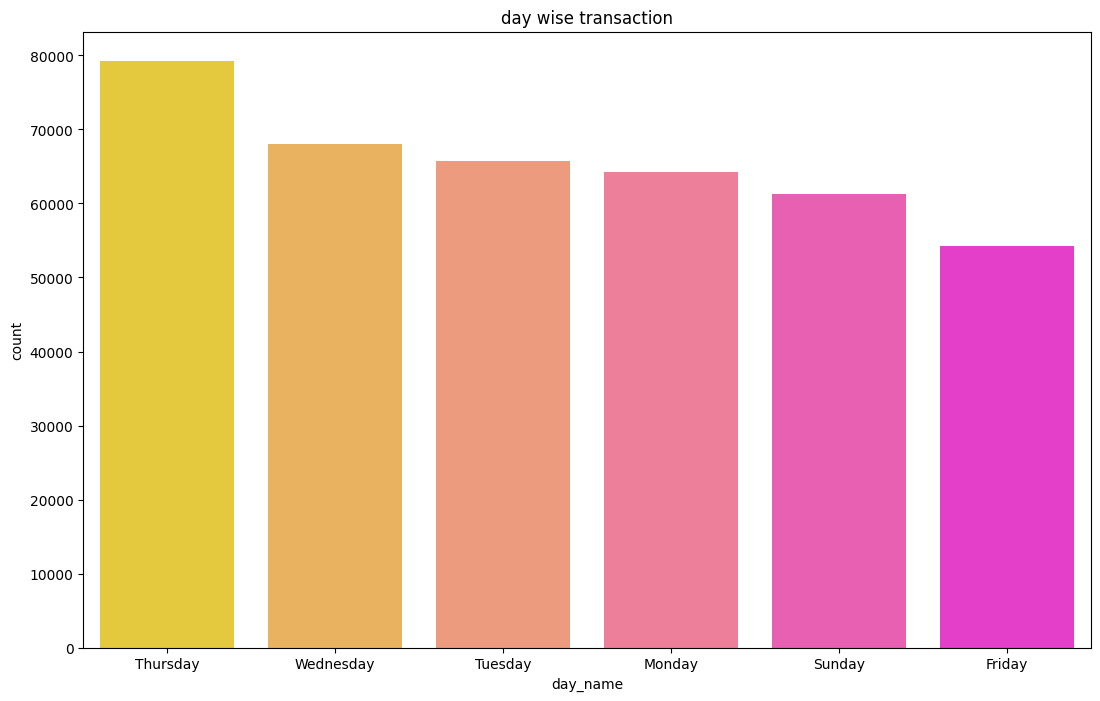

In [56]:
plt.figure(figsize=(13,8))
plt.title("day wise transaction")
sns.barplot(x="day_name",y="count",data=day_df,palette='spring_r')
plt.show()

We can see the maximum number of transaction are for thursday but we can also see there are no transaction on saturday at this point I have no idea why but there can be reasons porbably data is not availble for saturdays or no transactions happened on saturday.

Most of the customers have purchased the items in Thursday ,Wednesday and Tuesday. **bold text**

**Hour**

In [57]:
Hour_df=data["Hour"].value_counts().reset_index()

In [58]:
Hour_df.columns=["hour","count"]

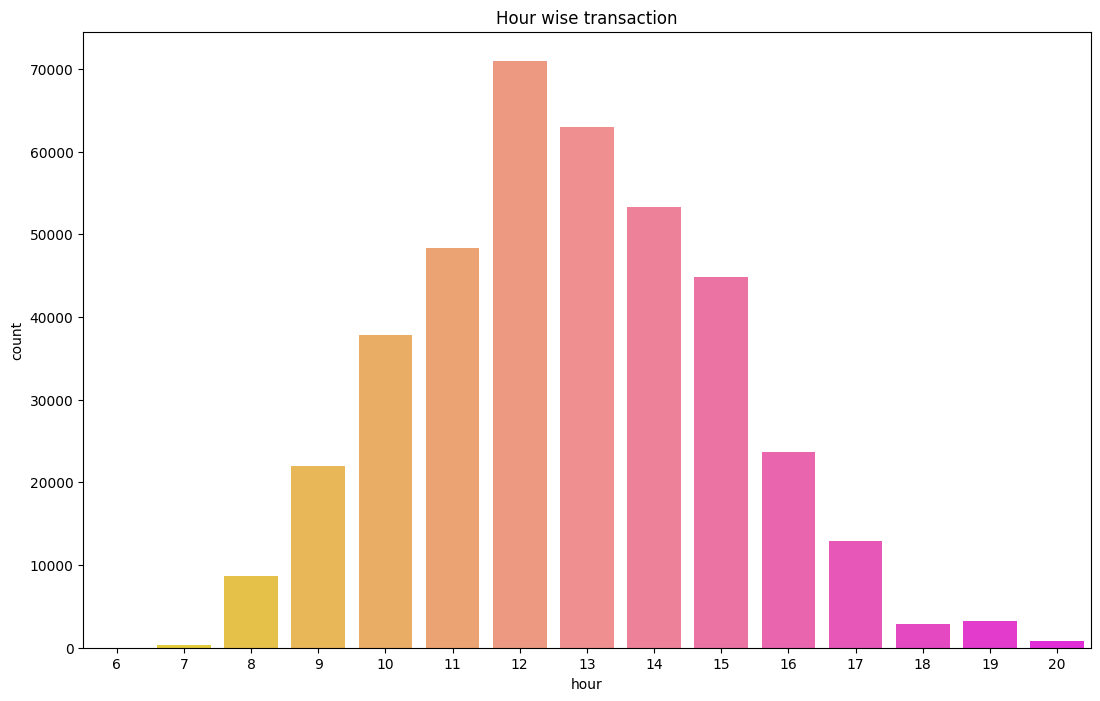

In [59]:
plt.figure(figsize=(13,8))
plt.title("Hour wise transaction")
sns.barplot(x="hour",y="count",data=Hour_df,palette='spring_r')
plt.show()

**From the above graph we can say that most numbers of purchasing is done between 12pm clock to 3pm.**

In [60]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34


In [61]:

#dividing hours into morning, afternoon and evening
def time_type(Hour):
  if (Hour>=6) and (Hour<=11):
    return "morning"
  elif (Hour>=12) and (Hour<=17):
    return "afternon"
  else:
    return "evening"

In [62]:
#applying function we created on hour column
data["type_time"]=data["Hour"].apply(time_type)

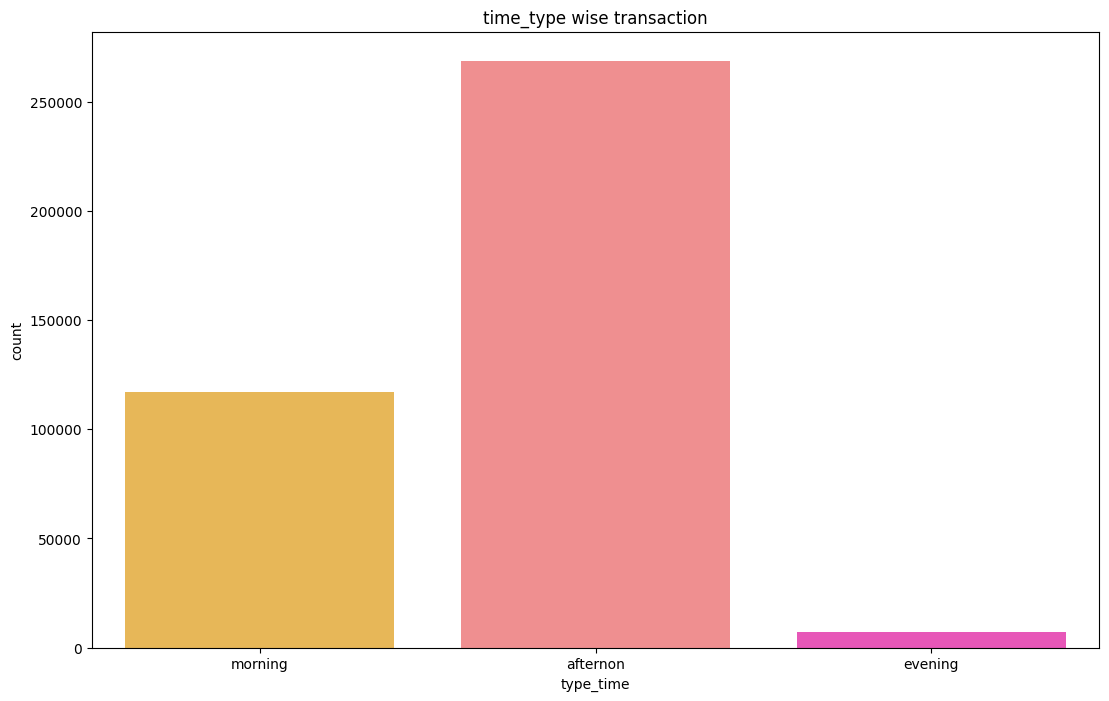

In [63]:
#plotting for time type
plt.figure(figsize=(13,8))
plt.title("time_type wise transaction")
sns.countplot(x="type_time",data=data,palette='spring_r')
plt.show()

Most of the customers have purchased the items in Afternoon.

Moderate numbers of customers have purchased the items in Morning and least numbers of customers have purchased the items in Evening.To increasse transacction at evening we can do one thing provide the offers/discounts at evening **bold text**

In [64]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,Total Price,type_time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,8,15.30,morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34,morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,8,22.00,morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34,morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34,morning


In [65]:
numeric_columns=data.select_dtypes(include=["float64","int32","int64"]).columns

In [66]:
categorical_columns=data.select_dtypes(include=["object"]).columns

In [67]:
print("Numeric Columns:",numeric_columns)
print("Categorical Columns:",categorical_columns)

Numeric Columns: Index(['Quantity', 'UnitPrice', 'CustomerID', 'Hour', 'Total Price'], dtype='object')
Categorical Columns: Index(['InvoiceNo', 'StockCode', 'Description', 'Country', 'Month', 'Day',
       'type_time'],
      dtype='object')


In [68]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,Total Price,type_time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,8,15.30,morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34,morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,8,22.00,morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34,morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34,morning


In [69]:
data.shape

(392732, 13)

In [70]:
data.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
Month,object
Day,object


In [71]:
import numpy as np
import pandas as pd

# Now apply the log transformation.
data_log = data.copy() # Create a copy to avoid modifying the original DataFrame
# Select the numeric columns from the original DataFrame 'data' using the column names in 'numeric_columns'
data_log[numeric_columns] = np.log(data[numeric_columns]) # Update the numeric columns with log values

<Axes: xlabel='Total Price', ylabel='Count'>

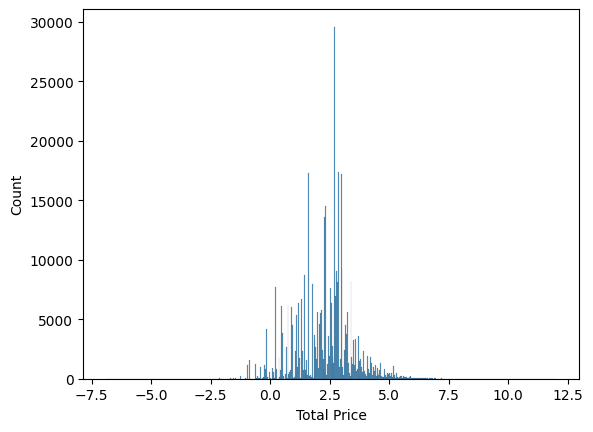

In [72]:
sns.histplot(data=data_log,x="Total Price")

<Axes: xlabel='Quantity', ylabel='Count'>

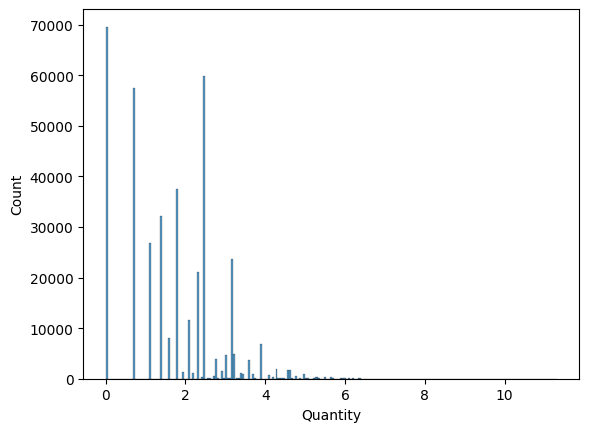

In [73]:
sns.histplot(data=data_log,x="Quantity")

In [ ]:
sns.pairplot(data_log)

In [74]:
data_log.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,Total Price,type_time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1.791759,2010-12-01 08:26:00,0.936093,9.789759,United Kingdom,December,Wednesday,2.079442,2.727853,morning
1,536365,71053,WHITE METAL LANTERN,1.791759,2010-12-01 08:26:00,1.220830,9.789759,United Kingdom,December,Wednesday,2.079442,3.012589,morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2.079442,2010-12-01 08:26:00,1.011601,9.789759,United Kingdom,December,Wednesday,2.079442,3.091042,morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,1.791759,2010-12-01 08:26:00,1.220830,9.789759,United Kingdom,December,Wednesday,2.079442,3.012589,morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,1.791759,2010-12-01 08:26:00,1.220830,9.789759,United Kingdom,December,Wednesday,2.079442,3.012589,morning


In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Replace infinite values with NaN
data_log[numeric_columns] = data_log[numeric_columns].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values in numeric_columns
data_log.dropna(subset=numeric_columns, inplace=True)

# Alternatively, you can replace infinite values with a large finite number
# or impute them using a suitable strategy
# data_log[numeric_columns] = data_log[numeric_columns].replace([np.inf, -np.inf], 1e10)
# Or use imputation techniques from sklearn.impute

# Proceed with scaling
Scalar = StandardScaler()
data_log[numeric_columns] = Scalar.fit_transform(data_log[numeric_columns])

with open('scaler.pkl', 'wb') as f:
    pickle.dump(Scalar, f)

In [76]:
data_log.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,Total Price,type_time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.105985,2010-12-01 08:26:00,0.315223,1.42844,United Kingdom,December,Wednesday,-2.45237,0.356479,morning
1,536365,71053,WHITE METAL LANTERN,0.105985,2010-12-01 08:26:00,0.621492,1.42844,United Kingdom,December,Wednesday,-2.45237,0.597686,morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,0.344654,2010-12-01 08:26:00,0.396441,1.42844,United Kingdom,December,Wednesday,-2.45237,0.664145,morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,0.105985,2010-12-01 08:26:00,0.621492,1.42844,United Kingdom,December,Wednesday,-2.45237,0.597686,morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,0.105985,2010-12-01 08:26:00,0.621492,1.42844,United Kingdom,December,Wednesday,-2.45237,0.597686,morning


In [77]:
data_log.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,float64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
Month,object
Day,object


**RFM Analysis**

In [78]:
import datetime as dt

In [79]:
data_log["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [80]:
import pandas as pd
import datetime as dt


today_date = pd.Timestamp(dt.date(2011, 12, 11)) # Convert today_date to Timestamp

rfm = data.groupby("CustomerID").agg(
    {
        "InvoiceDate": lambda date: (today_date - date.max()).days,
        "InvoiceNo": lambda num: num.nunique(),
        "Total Price": lambda TotalPrice: TotalPrice.sum()
    }
)

In [81]:
rfm.columns=["Recency","Frequency","Monetary"]
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05


In [82]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [83]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05


In [84]:
rfm=rfm[rfm["Monetary"]>0]
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05


In [85]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4338.0,93.059474,100.012264,1.00,18.0000,51.00,142.7500,374.00
Frequency,4338.0,4.272706,7.706221,1.00,1.0000,2.00,5.0000,210.00
Monetary,4338.0,2048.688081,8985.230220,3.75,306.4825,668.57,1660.5975,280206.02


In [86]:
rfm["recency_score"]=pd.qcut(rfm["Recency"],q=5,labels=[5,4,3,2,1])


In [87]:
rfm["frequency_score"]=pd.qcut(rfm["Frequency"].rank(method="first"),q=5,labels=[1,2,3,4,5])

In [88]:
rfm["monetary_score"]=pd.qcut(rfm["Monetary"],q=5,labels=[1,2,3,4,5])

In [89]:
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,5
12347.0,3,7,4310.00,5,5,5
12348.0,76,4,1797.24,2,4,4
12349.0,19,1,1757.55,4,1,4
12350.0,311,1,334.40,1,1,2


In [90]:
rfm["RFM_SCORE"]=rfm["recency_score"].astype(str)+rfm["frequency_score"].astype(str)

In [91]:
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,5,11
12347.0,3,7,4310.00,5,5,5,55
12348.0,76,4,1797.24,2,4,4,24
12349.0,19,1,1757.55,4,1,4,41
12350.0,311,1,334.40,1,1,2,11


In [92]:
rfm.sample(10)

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12673.0,6,2,610.52,5,2,3,52
13435.0,6,7,3809.89,5,5,5,55
13301.0,104,4,618.09,2,4,3,24
13395.0,186,1,307.72,1,1,2,11
16448.0,199,1,182.99,1,2,1,12
12611.0,53,1,1193.32,3,1,4,31
17707.0,186,2,152.40,1,3,1,13
12436.0,100,1,509.01,2,1,3,21
14966.0,15,1,183.02,4,1,1,41


In [93]:
# segmenting customers using RFM score
seg_map={
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About To Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}
rfm["segment"]=rfm["RFM_SCORE"].replace(seg_map,regex=True)
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,11,Hibernating
12347.0,3,7,4310.00,5,5,5,55,Champions
12348.0,76,4,1797.24,2,4,4,24,At Risk
12349.0,19,1,1757.55,4,1,4,41,Promising
12350.0,311,1,334.40,1,1,2,11,Hibernating


In [94]:
rfm[["segment","Recency","Frequency","Monetary"]].groupby("segment").agg(["mean","count","max","min"])

Recency                 Frequency                 \
                           mean count  max min       mean count  max min   
segment                                                                    
About To Sleep        53.312500   352   72  34   1.161932   352    2   1   
At Risk              153.785835   593  374  73   2.878583   593    6   2   
Can't Loose          132.968254    63  373  73   8.380952    63   34   6   
Champions              6.361769   633   13   1  12.417062   633  210   3   
Hibernating          217.605042  1071  374  73   1.101774  1071    2   1   
Loyal customers       33.608059   819   72  15   6.479853   819   63   3   
Need Attention        52.427807   187   72  34   2.326203   187    3   2   
New Customers          7.428571    42   13   1   1.000000    42    1   1   
Potential Loyalists   17.398760   484   33   1   2.010331   484    3   1   
Promising             23.510638    94   33  15   1.000000    94    1   1   

                        Monetary                           
                            mean count        max     min  
segment                                                    
About To Sleep        469.893437   352    6207.67    6.20  
At Risk              1080.920373   593   44534.30   52.00  
Can't Loose          2790.101429    63   10254.18   70.02  
Champions            6843.160521   633  280206.02  201.12  
Hibernating           487.628909  1071   77183.60    3.75  
Loyal customers      2855.791173   819  124914.53   36.56  
Need Attention        892.505936   187   12601.83    6.90  
New Customers         385.022381    42    3861.00   89.94  
Potential Loyalists  1036.483099   484  168472.50   20.80  
Promising             292.050213    94    1757.55   30.00

In [95]:
rfm["segment"].value_counts()

,count
segment,
Hibernating,1071
Loyal customers,819
Champions,633
At Risk,593
Potential Loyalists,484
About To Sleep,352
Need Attention,187
Promising,94
Can't Loose,63


In [96]:


from sklearn.preprocessing import OneHotEncoder

# Assuming 'segment' is the column you want to one-hot encode
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the 'segment' column
encoded_segment = onehot_encoder.fit_transform(rfm[['segment']])

# Create column names for the encoded features
encoded_segment_columns = onehot_encoder.get_feature_names_out(['segment'])

# Create a DataFrame from the encoded data
encoded_segment_df = pd.DataFrame(encoded_segment, columns=encoded_segment_columns, index=rfm.index)

# Concatenate the encoded DataFrame with the original data
rfm = pd.concat([rfm, encoded_segment_df], axis=1)

# Drop the original 'segment' column
rfm.drop(columns=['segment'], inplace=True)

# Display the updated DataFrame
print(rfm.head())

            Recency  Frequency  Monetary recency_score frequency_score  \
CustomerID                                                               
12346.0         326          1  77183.60             1               1   
12347.0           3          7   4310.00             5               5   
12348.0          76          4   1797.24             2               4   
12349.0          19          1   1757.55             4               1   
12350.0         311          1    334.40             1               1   

           monetary_score RFM_SCORE  segment_About To Sleep  segment_At Risk  \
CustomerID                                                                     
12346.0                 5        11                     0.0              0.0   
12347.0                 5        55                     0.0              0.0   
12348.0                 4        24                     0.0              1.0   
12349.0                 4        41                     0.0              0.0   
1

In [97]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data (assuming 'data' contains only numerical columns you want to scale)
scaled_data = scaler.fit_transform(rfm)

# Convert the result back to a DataFrame if needed, with the original column names
scaled_data_df = pd.DataFrame(scaled_data, columns=rfm.columns)

# Display the scaled data
scaled_data_df.head()


,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment_About To Sleep,segment_At Risk,segment_Can't Loose,segment_Champions,segment_Hibernating,segment_Loyal customers,segment_Need Attention,segment_New Customers,segment_Potential Loyalists,segment_Promising
0,2.329388,-0.424733,8.363010,-1.419939,-1.414051,1.414051,-1.478862,-0.297168,-0.397925,-0.121395,-0.413340,1.746545,-0.482428,-0.212248,-0.098876,-0.354378,-0.148825
1,-0.900588,0.353949,0.251699,1.410803,1.414051,1.414051,1.470210,-0.297168,-0.397925,-0.121395,2.419314,-0.572559,-0.482428,-0.212248,-0.098876,-0.354378,-0.148825
2,-0.170593,-0.035392,-0.027988,-0.712253,0.707025,0.707025,-0.607545,-0.297168,2.513035,-0.121395,-0.413340,-0.572559,-0.482428,-0.212248,-0.098876,-0.354378,-0.148825
3,-0.740589,-0.424733,-0.032406,0.703118,-1.414051,0.707025,0.531869,-0.297168,-0.397925,-0.121395,-0.413340,-0.572559,-0.482428,-0.212248,-0.098876,-0.354378,6.719296
4,2.179389,-0.424733,-0.190812,-1.419939,-1.414051,-0.707025,-1.478862,-0.297168,-0.397925,-0.121395,-0.413340,1.746545,-0.482428,-0.212248,-0.098876,-0.354378,-0.148825


In [98]:
scaled_data_df.shape

(4338, 17)

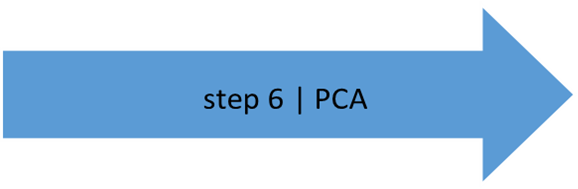

In [99]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)
customer_data_pca = pca.fit_transform(scaled_data_df)

with open('pca.pkl', 'wb') as f:
    pickle.dump(pca, f)


In [100]:
customer_data_pca.shape

(4338, 11)

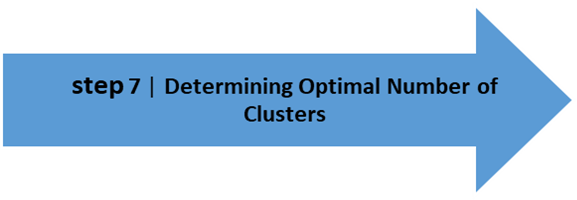

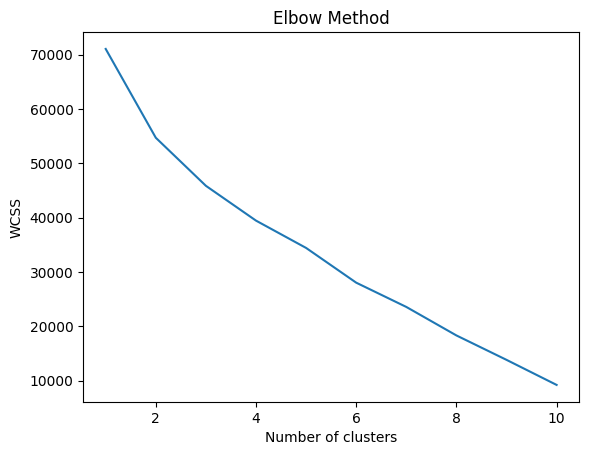

In [101]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(customer_data_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

    #inertia_ is the formula used to segregate the data points into clusters

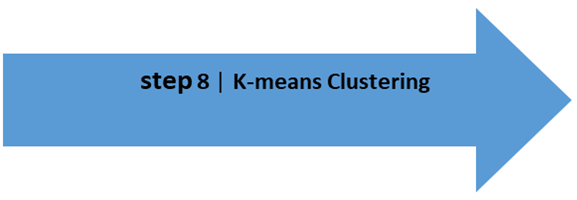

In [102]:
#Model Build
kmeansmodel = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeansmodel.fit(customer_data_pca)
y_kmeans = kmeansmodel.predict(customer_data_pca)

with open('kmeans.pkl', 'wb') as f:
    pickle.dump(kmeansmodel, f)

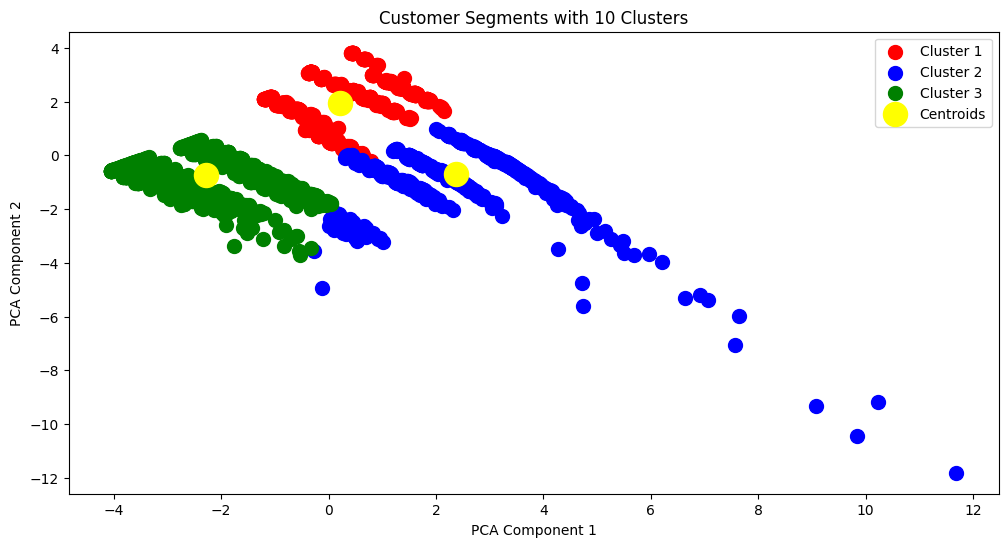

In [103]:
plt.figure(figsize=(12, 6))

# Define colors for the clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'brown', 'pink']

# Plot each cluster using a loop
for i in range(3):  # For 10 clusters
    plt.scatter(customer_data_pca[y_kmeans == i, 0], customer_data_pca[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')

# Plot the centroids
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids')

# Plot settings
plt.title('Customer Segments with 10 Clusters')  # Corrected title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


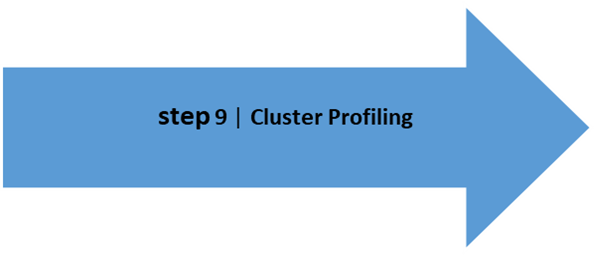

In [104]:
import pandas as pd

# Assuming customer_data_pca is your NumPy array and y_kmeans is your cluster assignments
# Create a Pandas DataFrame
customer_data_pca_df = pd.DataFrame(customer_data_pca)

# Add the cluster assignments as a column
customer_data_pca_df['Cluster'] = y_kmeans

# Now you can use groupby
cluster_profile = customer_data_pca_df.groupby('Cluster').mean()

print(cluster_profile)

                0         1         2         3         4         5         6  \
Cluster                                                                         
0        0.219996  1.935701  0.101818  0.378309  0.247112  0.317719 -0.309806   
1        2.373911 -0.680755  0.096237 -0.564123  0.113290 -0.066315  0.045604   
2       -2.287853 -0.726598 -0.157012  0.245811 -0.272862 -0.160124  0.173283   

                7         8         9        10  
Cluster                                          
0        0.120496 -0.071958  0.567767  0.025348  
1        0.048475  0.057223 -0.350768  0.004521  
2       -0.126964 -0.001703 -0.077191 -0.021602  


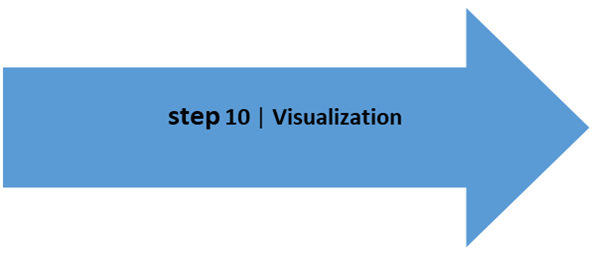

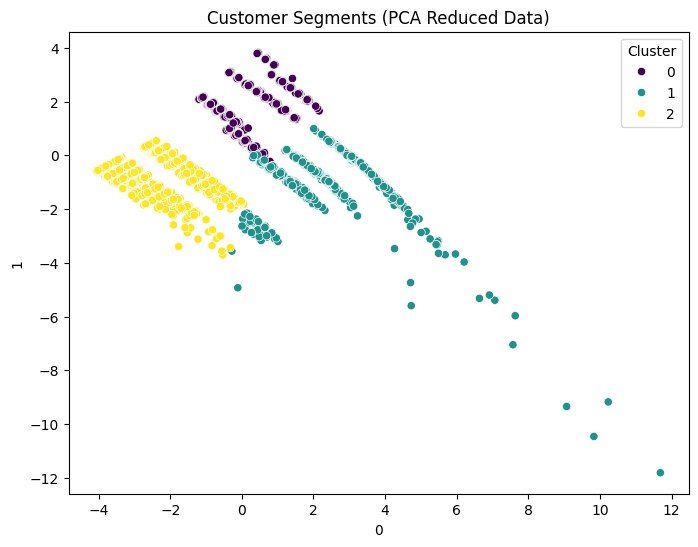

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming customer_data_pca is your NumPy array and y_kmeans is your cluster assignments
# If customer_data_pca is already a DataFrame with a 'Cluster' column, skip this step
import pandas as pd
customer_data_pca = pd.DataFrame(customer_data_pca)
customer_data_pca['Cluster'] = y_kmeans

# Plot clusters using the first two PCA components
plt.figure(figsize=(8,6))
sns.scatterplot(x=customer_data_pca.iloc[:, 0], y=customer_data_pca.iloc[:, 1], hue=customer_data_pca['Cluster'], palette='viridis')
plt.title('Customer Segments (PCA Reduced Data)')
plt.show()

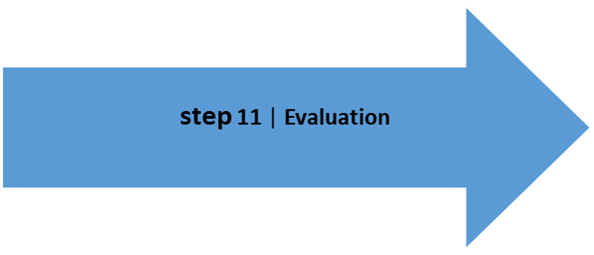

In [106]:
from sklearn.metrics import silhouette_score

# Silhouette score to evaluate the clustering quality
score = silhouette_score(customer_data_pca, customer_data_pca['Cluster'])
print(f'Silhouette Score: {score}')


Silhouette Score: 0.40851920926265206


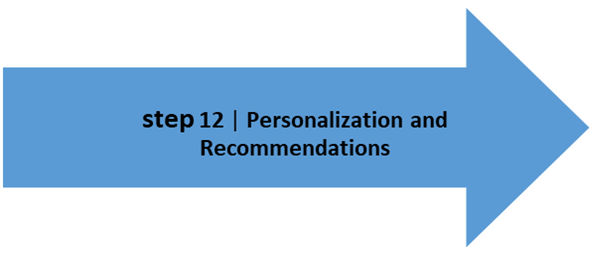

Create strategies for each cluster (e.g., high-spending, frequent buyers get premium offers).